{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

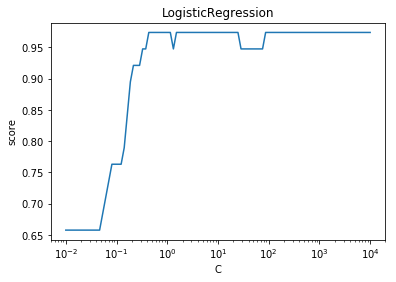

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,cross_validation
print(datasets.load_iris())
def load_data():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    iris=datasets.load_iris() # 使用 scikit-learn 自带的 iris 数据集
    X_train=iris.data
    y_train=iris.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
		random_state=0,stratify=y_train)# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
def test_LogisticRegression(*data):
    '''
    测试 LogisticRegression 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr = linear_model.LogisticRegression()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))
def test_LogisticRegression_multinomial(*data):
    '''
    测试 LogisticRegression 的预测性能随 multi_class 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))
def test_LogisticRegression_C(*data):
    '''
    测试 LogisticRegression 的预测性能随  C  参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,4,num=100)
    scores=[]
    for C in Cs:
        regr = linear_model.LogisticRegression(C=C)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,scores)
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LogisticRegression")
    plt.show()

if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data() # 加载用于分类的数据集
    test_LogisticRegression(X_train,X_test,y_train,y_test) # 调用  test_LogisticRegression
    test_LogisticRegression_multinomial(X_train,X_test,y_train,y_test) # 调用  test_LogisticRegression_multinomial
    test_LogisticRegression_C(X_train,X_test,y_train,y_test) # 调用  test_LogisticRegression_C